In [1]:
# https://www.kaggle.com/c/stanford-covid-vaccine/data?select=sample_submission.csv

In [6]:
! pwd

/home/dohk/GoogleDrive/workspace_BIO


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
import tensorflow as tf

In [7]:
train = pd.read_json('./database/train.json', lines=True)
test = pd.read_json('./database/test.json', lines=True)
sample_sub = pd.read_csv('./database/sample_submission.csv')

In [8]:
print(len(train.loc[train['signal_to_noise'] > 1]))

2096


In [9]:
print(len(train.loc[(train['signal_to_noise'] > 1) & (train['SN_filter'] != 1)]))

509


In [10]:
print(train.columns)

Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
       'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
       'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'],
      dtype='object')


In [11]:
#sneak peak
print(train.shape)
if ~train.isnull().values.any(): print('No missing values')
train.head()

(2400, 19)
No missing values


,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [12]:
#sneak peak
print(test.shape)
if ~test.isnull().values.any(): print('No missing values')
test.head()

(3634, 7)
No missing values


,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [13]:
#sneak peak
print(sample_sub.shape)
if ~sample_sub.isnull().values.any(): print('No missing values')
sample_sub.head()

(457953, 6)
No missing values


,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


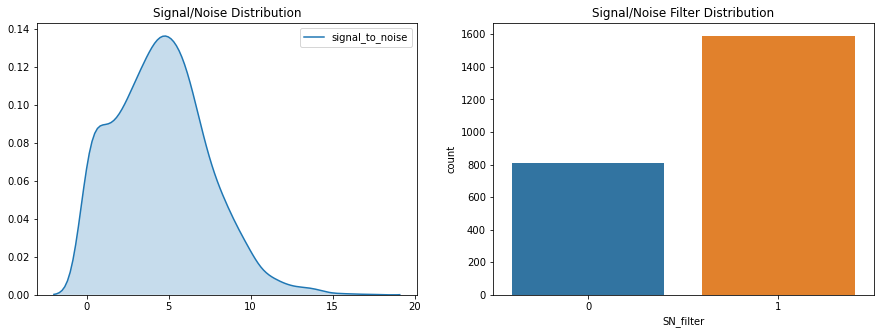

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(train['signal_to_noise'], shade=True, ax=ax[0])
sns.countplot(train['SN_filter'], ax=ax[1])

ax[0].set_title('Signal/Noise Distribution')
ax[1].set_title('Signal/Noise Filter Distribution');

In [19]:
print(f"Samples with signal_to_noise greater than 1: {len(train.loc[(train['signal_to_noise'] > 1 )])}")
print(f"Samples with SN_filter = 1: {len(train.loc[(train['SN_filter'] == 1 )])}")

Samples with signal_to_noise greater than 1: 2096
Samples with SN_filter = 1: 1589


In [20]:
#target columns
target_cols = ['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C']

In [21]:
token2int = {x:i for i, x in enumerate('().ACGUBEHIMSX')}

In [22]:
def preprocess_inputs(df, cols=['sequence', 'structure', 'predicted_loop_type']):
    return np.transpose(
        np.array(
            df[cols]
            .applymap(lambda seq: [token2int[x] for x in seq])
            .values
            .tolist()
        ),
        (0, 2, 1)
    )

In [25]:
train_inputs = preprocess_inputs(train.loc[train['signal_to_noise'] > 1])
train_labels = np.array(train.loc[train['signal_to_noise'] > 1][target_cols].values.tolist()).transpose((0, 2, 1))

In [26]:
len(token2int)

14

In [27]:
# https://www.kaggle.com/c/stanford-covid-vaccine/discussion/183211
def mcrmse(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)

In [28]:
def gru_layer(hidden_dim, dropout):
    return tf.keras.layers.Bidirectional(
                                tf.keras.layers.GRU(hidden_dim,
                                dropout=dropout,
                                return_sequences=True,
                                kernel_initializer='orthogonal'))

def lstm_layer(hidden_dim, dropout):
    return tf.keras.layers.Bidirectional(
                                tf.keras.layers.LSTM(hidden_dim,
                                dropout=dropout,
                                return_sequences=True,
                                kernel_initializer='orthogonal'))

def build_model(gru=False, lstm=False, seq_len=107, pred_len=68, dropout=0.4,
                embed_dim=100, hidden_dim=128, layers=3):
    
    inputs = tf.keras.layers.Input(shape=(seq_len, 3))

    embed = tf.keras.layers.Embedding(input_dim=len(token2int), output_dim=embed_dim)(inputs)
    reshaped = tf.reshape(
        embed, shape=(-1, embed.shape[1],  embed.shape[2] * embed.shape[3]))
    
    hidden = tf.keras.layers.SpatialDropout1D(.2)(reshaped)
    
    if gru:
        for _ in range(layers):
            hidden = gru_layer(hidden_dim, dropout)(hidden)
        
    elif lstm:
        for _ in range(layers):
            hidden = lstm_layer(hidden_dim, dropout)(hidden)
    
    truncated = hidden[:, :pred_len]
    out = tf.keras.layers.Dense(5, activation='linear')(truncated)
    
    model = tf.keras.Model(inputs=inputs, outputs=out)
    adam = tf.optimizers.Adam()
    model.compile(optimizer=adam, loss=mcrmse)
    
    return model

In [29]:
#basic training configuration
FOLDS = 4
EPOCHS = 90
REPEATS = 3
BATCH_SIZE = 64
VERBOSE = 2
SEED = 34

In [30]:
public_df = test.query("seq_length == 107").copy()
private_df = test.query("seq_length == 130").copy()

public_inputs = preprocess_inputs(public_df)
private_inputs = preprocess_inputs(private_df)

In [31]:
STRATIFY=True

In [ ]:
gru_histories = []
gru_private_preds = np.zeros((private_df.shape[0], 130, 5))
gru_public_preds = np.zeros((public_df.shape[0], 107, 5))

rkf = RepeatedKFold(FOLDS, n_repeats = REPEATS, random_state = SEED)
rskf = RepeatedStratifiedKFold(FOLDS, n_repeats = REPEATS, random_state = SEED)

for f, (train_index, val_index) in enumerate((rskf if STRATIFY else rkf)
                                             .split(train_inputs,
                                             train.loc[train['signal_to_noise'] > 1]['SN_filter'] if STRATIFY else None)):
    
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(patience=6)
    sv_gru = tf.keras.callbacks.ModelCheckpoint(f'gru-{f}.h5')

    train_ = train_inputs[train_index]
    train_labs = train_labels[train_index]
    val_ = train_inputs[val_index]
    val_labs = train_labels[val_index]

    gru = build_model(gru=True)
    history = gru.fit(train_, train_labs, 
                      validation_data=(val_,val_labs),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=[lr_callback,sv_gru],
                      verbose = VERBOSE)  

    gru_histories.append(history)

    gru_short = build_model(gru=True, seq_len=107, pred_len=107)
    gru_short.load_weights(f'gru-{f}.h5')
    gru_public_pred = gru_short.predict(public_inputs) / (FOLDS * REPEATS)

    gru_long = build_model(gru=True, seq_len=130, pred_len=130)
    gru_long.load_weights(f'gru-{f}.h5')
    gru_private_pred = gru_long.predict(private_inputs) / (FOLDS * REPEATS)

    gru_public_preds += gru_public_pred
    gru_private_preds += gru_private_pred

    del gru_short, gru_long

/home/dohk/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_splits=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Epoch 1/90
25/25 - 12s - loss: 0.4647 - val_loss: 0.4103 - lr: 0.0010
Epoch 2/90
25/25 - 12s - loss: 0.3993 - val_loss: 0.3893 - lr: 0.0010
Epoch 3/90
25/25 - 13s - loss: 0.3843 - val_loss: 0.3765 - lr: 0.0010
Epoch 4/90
25/25 - 13s - loss: 0.3699 - val_loss: 0.3590 - lr: 0.0010
Epoch 5/90
25/25 - 13s - loss: 0.3571 - val_loss: 0.3493 - lr: 0.0010
Epoch 6/90
25/25 - 13s - loss: 0.3486 - val_loss: 0.3432 - lr: 0.0010
Epoch 7/90
25/25 - 13s - loss: 0.3415 - val_loss: 0.3357 - lr: 0.0010
Epoch 8/90
25/25 - 13s - loss: 0.3347 - val_loss: 0.3278 - lr: 0.0010
Epoch 9/90
25/25 - 13s - loss: 0.3300 - val_loss: 0.3243 - lr: 0.0010
Epoch 10/90
25/25 - 13s - loss: 0.3260 - val_loss: 0.3205 - lr: 0.0010
Epoch 11/90
25/25 - 13s - loss: 0.3225 - val_loss: 0.3158 - lr: 0.0010
Epoch 12/90
25/25 - 13s - loss: 0.3164 - val_loss: 0.3090 - lr: 0.0010
Epoch 13/90
25/25 - 13s - loss: 0.3124 - val_loss: 0.3037 - lr: 0.0010
Epoch 14/90
25/25 - 13s - loss: 0.3063 - val_loss: 0.3006 - lr: 0.0010
Epoch 15/90
25/

In [ ]:
print(f" GRU mean fold MCRMSE: {np.mean([min(history.history['val_loss']) for history in gru_histories])}")

In [ ]:
STRATIFY=True

In [ ]:
lstm_histories = []
lstm_private_preds = np.zeros((private_df.shape[0], 130, 5))
lstm_public_preds = np.zeros((public_df.shape[0], 107, 5))

for f, (train_index, val_index) in enumerate((rskf if STRATIFY else rkf)
                                             .split(train_inputs,
                                             train.loc[train['signal_to_noise'] > 1]['SN_filter'] if STRATIFY else None)):
    
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(patience=6)
    sv_lstm = tf.keras.callbacks.ModelCheckpoint(f'lstm-{f}.h5')

    train_ = train_inputs[train_index]
    train_labs = train_labels[train_index]
    val_ = train_inputs[val_index]
    val_labs = train_labels[val_index]

    lstm = build_model(lstm=True)
    history = lstm.fit(
                        train_, train_labs, 
                        validation_data=(val_,val_labs),
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        callbacks=[lr_callback,sv_lstm],
                        verbose = VERBOSE)  

    lstm_histories.append(history)

    lstm_short = build_model(lstm=True, seq_len=107, pred_len=107)
    lstm_short.load_weights(f'lstm-{f}.h5')
    lstm_public_pred = lstm_short.predict(public_inputs) / (FOLDS * REPEATS)

    lstm_long = build_model(lstm=True, seq_len=130, pred_len=130)
    lstm_long.load_weights(f'lstm-{f}.h5')
    lstm_private_pred = lstm_long.predict(private_inputs) / (FOLDS * REPEATS)

    lstm_public_preds += lstm_public_pred
    lstm_private_preds += lstm_private_pred

    del lstm_short, lstm_long

In [ ]:
print(f" LSTM mean fold validation MCRMSE: {np.mean([min(history.history['val_loss']) for history in lstm_histories])}")

In [ ]:
plot_learning_curves(results)

In [ ]:
def format_predictions(public_preds, private_preds):
    preds = []
    
    for df, preds_ in [(public_df, public_preds), (private_df, private_preds)]:
        for i, uid in enumerate(df.id):
            single_pred = preds_[i]

            single_df = pd.DataFrame(single_pred, columns=target_cols)
            single_df['id_seqpos'] = [f'{uid}_{x}' for x in range(single_df.shape[0])]

            preds.append(single_df)

    return pd.concat(preds)

In [ ]:
lstm_preds = format_predictions(lstm_public_preds, lstm_private_preds)
gru_preds = format_predictions(gru_public_preds, gru_private_preds)

In [ ]:
gru_weight = .5
lstm_weight = .5

In [ ]:
blended_preds = pd.DataFrame()
blended_preds['id_seqpos'] = gru_preds['id_seqpos']
blended_preds['reactivity'] = gru_weight*gru_preds['reactivity'] + lstm_weight*lstm_preds['reactivity']
blended_preds['deg_Mg_pH10'] = gru_weight*gru_preds['deg_Mg_pH10'] + lstm_weight*lstm_preds['deg_Mg_pH10']
blended_preds['deg_pH10'] = gru_weight*gru_preds['deg_pH10'] + lstm_weight*lstm_preds['deg_pH10']
blended_preds['deg_Mg_50C'] = gru_weight*gru_preds['deg_Mg_50C'] + lstm_weight*lstm_preds['deg_Mg_50C']
blended_preds['deg_50C'] = gru_weight*gru_preds['deg_50C'] + lstm_weight*lstm_preds['deg_50C']

In [ ]:
submission = sample_sub[['id_seqpos']].merge(blended_preds, on=['id_seqpos'])
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)
print('Submission saved')